## Nome: Nicholas Lima do Nascimento
## Matricula: 697


---

## **Atividade 4** – Zeros de Funções: Refinamento de Raízes Reais pelo Método de Newton–Raphson

**Objetivo:** neste notebook, você irá **aplicar o método de Newton–Raphson** e **refinar raízes reais** em problemas contextualizados.  
Você encontrará **códigos-base, imports e células-guia** para implementar o método, analisar convergência e responder às questões propostas.

Material de apoio:
* https://youtu.be/gpaXPYKDWJg?si=1yG79BmrI7GQgzXY
* https://flexiple.com/python/newton-raphson-method-python

> Importante: execute as células na ordem. Se precisar, reinicie o kernel e rode tudo novamente.



---
# Método de Newton–Raphson

O **Método de Newton–Raphson** é um método iterativo usado para encontrar raízes de equações reais, isto é, soluções para $f(x)=0$, onde $f(x)$ é uma função derivável. Ele constrói uma sequência de aproximações da raiz utilizando a derivada da função a cada iteração.

## Como funciona

1. **Chute inicial:**
   Começa-se com um valor inicial $x_0$ próximo à raiz desejada.

2. **Tangente:**
   Traça-se a reta tangente ao gráfico de $f(x)$ no ponto $(x_0, f(x_0))$.

3. **Próxima aproximação:**
   A próxima aproximação $x_1$ é o ponto onde essa tangente intercepta o eixo $x$.

4. **Iteração:**
   Repete-se o processo (passos 2 e 3) com a nova aproximação $x_1$ até que a diferença entre duas iterações sucessivas seja menor que uma tolerância (erro máximo) especificada.

## Fórmula

A fórmula principal do método é:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

**Onde:**

* $x_{n+1}$ é a próxima aproximação da raiz;
* $x_n$ é a aproximação atual;
* $f(x_n)$ é o valor da função na aproximação atual;
* $f'(x_n)$ é o valor da derivada da função na aproximação atual.


---
# Códigos auxiliares para o desenvolvimento das questões.
> **Observação:** Realize as alterações necessárias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defina a função de destino cuja raiz você deseja encontrar
def target_function(x):
    return x**3 - 5*x**2 + 2*x + 1 # <- Modifique conforme o enunciado

# Calcula a derivada da função
def derivative_function(x):
    return 3*x**2 - 10*x + 2 # <- Calcule a derivada da função e modifique

In [14]:
# implementa o processo de iteração usando a fórmula de Newton-Raphson
def newton_raphson_method(initial_guess, tolerance, max_iterations):
    """
    Aplica o método de Newton–Raphson para aproximar uma raiz de target_function(x).

    :param initial_guess: chute inicial x0
    :param tolerance: tolerância para parada (critério |f(x)| < tolerance)
    :param max_iterations: número máximo de iterações
    :return: raiz aproximada (float)
    """
    x_n = initial_guess
    for iteration in range(max_iterations):
        f_x = target_function(x_n)
        f_prime_x = derivative_function(x_n)

        if abs(f_x) < tolerance:
            break

        x_n = x_n - f_x / f_prime_x

    return x_n, iteration

In [4]:
initial_guess  = 8.0     # chute inicial
tolerance      = 1e-9    # tolerância
max_iterations = 250     # máximo de iterações

In [11]:
# Plota o gráfico da função e raiz(es)
def plot_function_and_roots(xmin, xmax, roots=None):
    """
    Plota target_function(x) no intervalo [xmin, xmax] e marca raízes (se fornecidas).
    :param xmin: limite inferior do eixo x
    :param xmax: limite superior do eixo x
    :param roots: lista de raízes para destacar (ex.: [root]) ou None
    :param titulo: título do gráfico
    """
    xs = np.linspace(xmin, xmax, 400)
    ys = [target_function(x) for x in xs]

    plt.figure(figsize=(6,4))
    plt.axhline(0, linewidth=1)        # eixo x
    plt.plot(xs, ys, linewidth=2)      # f(x)

    if roots:
        for r in roots:
            plt.scatter([r], [target_function(r)], s=60, zorder=3)
            plt.axvline(r, linestyle='--', linewidth=1)
            plt.text(r, 0, f"{r:.4g}", ha='center', va='bottom')

    plt.xlim(xmin, xmax)
    plt.xlabel("x"); plt.ylabel("f(x)")
    plt.title("Título")
    plt.grid(True, alpha=0.3)
    plt.show()

Raiz estimada: 2.8169140527452883
Numero de iteracoes:  7


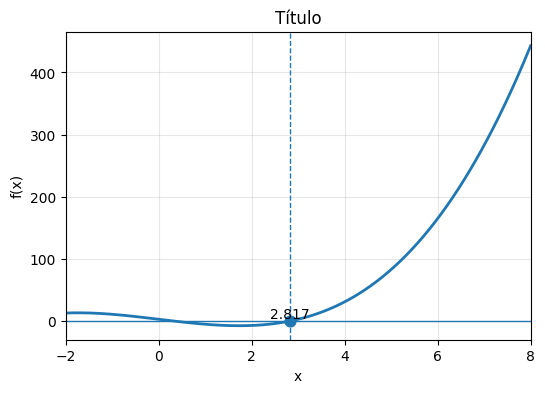

In [17]:
root, iterations = newton_raphson_method(initial_guess, tolerance, max_iterations)
print("Raiz estimada:", root)
print('Numero de iteracoes: ', iterations)
plot_function_and_roots(-2, 8, roots=[root])

---
### Parte Prática:
> Utilizando os códigos fornecidos, faça o que se pede.

## Questão 1 — Determinar as raízes da função:

**Enunciado.** Considere a função

$$
f(x)=x^3-9x+3.
$$

Determine a **raiz** no intervalo $[0,1]$ usando o **método de Newton–Raphson** com erro máximo de $10^{-2}$.

**Dados:**

* **Tolerância:** $\varepsilon = 10^{-2}$
* **Chute inicial:** $x_0 = 0{,}5$
* **Máximo de iterações:** $N_{\max} = 50$



a) Encontre a derivada da função:

Resposta: f'(x) = 3x² -9

$$
f'(x)=3x² - 9
$$

b) Valor aproximado da raiz:

In [20]:
def derivative_function(x:float):
    return 3*x**2 - 9

def target_function(x:float):
    return x**3 - 9*x + 3

raiz_aproximada, iterations = newton_raphson_method(0.5, 0.01, 50 )
print(f"Valor aproximado da raiz: {raiz_aproximada}")


Valor aproximado da raiz: 0.33760683760683763


c) Número de iterações realizadas até atingir o critério de parada:

In [21]:
print(f"Quantidade de iteracoes realizadas: {iterations}")

Quantidade de iteracoes realizadas: 2


d) Plote o gráfico da função e a raíz encontrada:





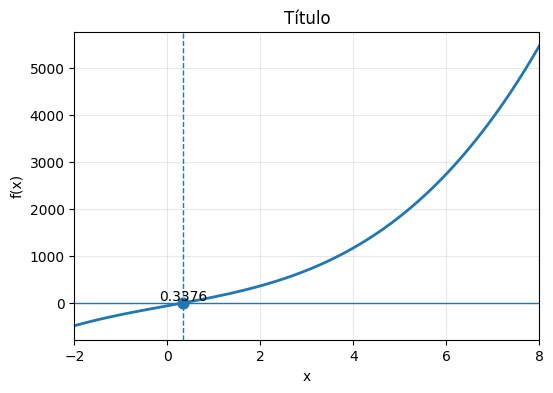

In [26]:

plot_function_and_roots(-2, 8, roots=[raiz_aproximada])

## Questão 2 — Deflexão de uma mola levemente não linear

Uma mola real apresenta leve não linearidade. A deflexão $x$ (em metros) sob uma força aplicada $F$ pode ser aproximada por:

$$
f(x) = k\,x + \alpha\,x^3 - F = 0.
$$


**Dados:**

* Rigidez linear $k = 180$ (unidades coerentes)
* Não linearidade $\alpha = 8$
* Força aplicada $F = 60$
* Intervalo de interesse: $x \in [0,\;0{,}6]$

* **Tolerância:** $\varepsilon = 10^{-2}$
* **Chute inicial:** $x_0 = 0{,}3$
* **Máximo de iterações:** $N_{\max} = 100$


a) Encontre a derivada da função:

Resposta: 
$$
f(x) = 180x + 8x^3 - 60 = 0.
$$
$$


f'(x) = 24x² + 180.

$$


b) Valor aproximado da raiz no intervalo:

In [24]:
max_iterations = 100
x_n = 0.3
tolerance = 0.01


def target_function(x:float):
    return 180*x + 8*x**3 - 60

def derivative_function(x: float):
    return 24*x**2 + 180

root, iterations = newton_raphson_method(x_n, tolerance, max_iterations)
print(f"Valor aproximado da raiz: {root}")


Valor aproximado da raiz: 0.33175230566534913


c) Número de iterações realizadas até atingir o critério de parada:

In [25]:
print(f"Quantidade de iteracoes realizadas: {iterations}")

Quantidade de iteracoes realizadas: 1


d) Plote o gráfico da função e a raíz encontrada:

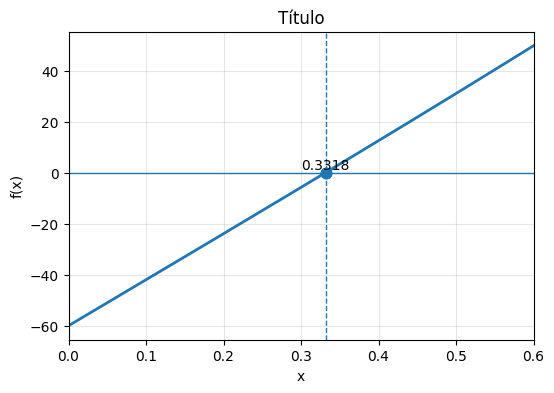

In [27]:
iter_min = 0
iter_max = 0.6
plot_function_and_roots(iter_min, iter_max, roots=[root])

---
### Parte Teórica:
>**Instruções:** assinale **V** (verdadeiro) ou **F** (falso) em cada afirmativa. **Justifique se for falso**.



a) Uma desvantagem de usar $\lvert f(x_k)\rvert < \varepsilon$ como critério de parada é que a função pode apenas chegar próximo de $0$, mas não cruzar o eixo $x$.

Resposta:V- Verdadeiro, pois como buscamos as raizes de funcoes onde os valores de f(x) = 0  e buscamos que os chegar o mais proximo percorrendo a funcao até o valor onde y =0 assim quanto mais proximo o chute inical mais rapido será encontrada o valor da raiz e  menos iteracoes no algoritmo, ha casos de funcoes que passam proximo ao reta do eixo X porem nao cruza o eixo.

b) Dado um intervalo $[a,b]$, se $f$ é contínua, $f(a) > 0$ e $f(b) > 0$, então não há raiz real no intervalo $[a,b]$.

REsposta: F - Falso, Pode haver um numero par de raízes mesmo que os sinais dos extremos do intervalo sejam iguais.

Resposta:

c) Dado um intervalo $[a,b]$, se $f$ é contínua, $f(a) > 0$ e $f(b) < 0$, então há exatamente uma única raiz real no intervalo $[a,b]$.

Resposta: F - Falso, pois o teorema de valor intermediario nao garante que irá existir apenas uma raiz real no intervalo.

Resposta:

d) O método de Newton terá uma melhor convergência se já estiver próximo da raiz.

Resposta:V - Verdadeio, a convergencia só é garantida se o valor de x0(chute inicial) estiver realmente proximo da raiz